# Step-by-Step Exploratory Data Analysis (EDA) using Python

In [ ]:
Name  :ROHIT KUMAR
Regd No :12114795
Roll no :30
sub :Int 353

# Step 1: Import Python Libraries


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Step 2: Reading Dataset

In [2]:
Data=pd.read_csv("Netflix Userbase.csv")

In [3]:
Data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
Data.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
Data.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [7]:
Data.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

# The below code helps to calculate the percentage of missing values in each column

In [8]:
(Data.isnull().sum()/(len(Data)))*100

User ID              0.0
Subscription Type    0.0
Monthly Revenue      0.0
Join Date            0.0
Last Payment Date    0.0
Country              0.0
Age                  0.0
Gender               0.0
Device               0.0
Plan Duration        0.0
dtype: float64

 In our dataset, the column User Id have only ID values, assuming they don’t have any predictive power to
 predict the dependent variable.

In [9]:
# Remove User Id. column from data
Data.drop("User ID",axis=1,inplace=True)
Data.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Change The Column Name Monthly Revenue Subscription Type And Plan Duration¶

In [10]:
Data.rename(columns = {"Monthly Revenue":"MonthlyRevenue"}, inplace=True)

In [11]:
Data.rename(columns = {"Subscription Type":"SubscriptionType"}, inplace=True)

In [12]:
Data.rename(columns = {"Join Date":"joinDate"}, inplace=True)
Data.rename(columns = {"Last Payment Date":"LastPaymentDate"}, inplace=True)
Data.rename(columns = {"Plan Duration":"PlanDuration"}, inplace=True)

In [13]:
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Step 4: Feature Engineering

# Calculate the duration of the subscription (e.g., "Subscription Duration" = "Last Payment Date" - "Join Date").

In [14]:
# Convert date columns to datetime objects
Data['joinDate'] = pd.to_datetime(Data['joinDate'], format='%d-%m-%y')
Data['LastPaymentDate'] = pd.to_datetime(Data['LastPaymentDate'], format='%d-%m-%y')


In [15]:
# Calculate the subscription duration
Data['Subscription Duration'] = Data['LastPaymentDate'] - Data['joinDate']

In [16]:
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration
0,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511 days
1,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655 days
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days
3,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351 days
4,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58 days


Extract year, month, and day from the "Join Date" and "Last Payment Date" columns. 
These features could help in analyze trends over time

In [17]:
# Extract year, month, and day
Data['joinYear'] = Data['joinDate'].dt.year
Data['Join Month'] = Data['joinDate'].dt.month
Data['Join Day'] = Data['joinDate'].dt.day

Data['LastPaymentYear'] = Data['LastPaymentDate'].dt.year
Data['Last Payment Month'] = Data['LastPaymentDate'].dt.month
Data['Last Payment Day'] = Data['LastPaymentDate'].dt.day

# Print the DataFrame with extracted date components
Data

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day
0,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511 days,2022,1,15,2023,6,10
1,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655 days,2021,9,5,2023,6,22
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days,2023,2,28,2023,6,27
3,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351 days,2022,7,10,2023,6,26
4,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58 days,2023,5,1,2023,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352 days,2022,7,25,2023,7,12
2496,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344 days,2022,8,4,2023,7,14
2497,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340 days,2022,8,9,2023,7,15
2498,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334 days,2022,8,12,2023,7,12


In [18]:
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day
0,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511 days,2022,1,15,2023,6,10
1,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655 days,2021,9,5,2023,6,22
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119 days,2023,2,28,2023,6,27
3,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351 days,2022,7,10,2023,6,26
4,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58 days,2023,5,1,2023,6,28


In [19]:
Data['Gender'] = Data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day
0,Basic,10,2022-01-15,2023-06-10,United States,28,0,Smartphone,1 Month,511 days,2022,1,15,2023,6,10
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,655 days,2021,9,5,2023,6,22
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,0,Smart TV,1 Month,119 days,2023,2,28,2023,6,27
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,351 days,2022,7,10,2023,6,26
4,Basic,10,2023-05-01,2023-06-28,Germany,33,0,Smartphone,1 Month,58 days,2023,5,1,2023,6,28


Encode the "Gender" column as binary (0 for Male, 1 for Female).

In [20]:
# Define age group bins and labels
age_bins = [0, 30, 50, 80,]  # Define age bins
age_labels = ['Young', 'Middle-aged', 'Elderly']  # Define corresponding labels

# Create the "Age Group" feature
Data['Age Group'] = pd.cut(Data['Age'], bins=age_bins, labels=age_labels, right=False)

# Print the DataFrame with the "Age Group" feature
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
0,Basic,10,2022-01-15,2023-06-10,United States,28,0,Smartphone,1 Month,511 days,2022,1,15,2023,6,10,Young
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,655 days,2021,9,5,2023,6,22,Middle-aged
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,0,Smart TV,1 Month,119 days,2023,2,28,2023,6,27,Middle-aged
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,351 days,2022,7,10,2023,6,26,Elderly
4,Basic,10,2023-05-01,2023-06-28,Germany,33,0,Smartphone,1 Month,58 days,2023,5,1,2023,6,28,Middle-aged


In [21]:
Data['Gender'] = Data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
0,Basic,10,2022-01-15,2023-06-10,United States,28,1,Smartphone,1 Month,511 days,2022,1,15,2023,6,10,Young
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,655 days,2021,9,5,2023,6,22,Middle-aged
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,1,Smart TV,1 Month,119 days,2023,2,28,2023,6,27,Middle-aged
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,351 days,2022,7,10,2023,6,26,Elderly
4,Basic,10,2023-05-01,2023-06-28,Germany,33,1,Smartphone,1 Month,58 days,2023,5,1,2023,6,28,Middle-aged


#  Data Cleaning/Wrangling

In [22]:
print(Data.Country.unique())
print(Data.SubscriptionType.unique())




['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
['Basic' 'Premium' 'Standard']


In [24]:
Data.describe(include='all')

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
count,2500,2500.000000,2500,2500,2500,2500.000000,2500.0,2500,2500,2500,2500.000000,2500.000000,2500.000000,2500.0,2500.000000,2500.000000,2500
unique,3,NaN,NaN,NaN,10,NaN,NaN,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Basic,NaN,NaN,NaN,United States,NaN,NaN,Laptop,1 Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle-aged
freq,999,NaN,NaN,NaN,451,NaN,NaN,636,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
mean,NaN,12.508400,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,NaN,38.795600,1.0,NaN,NaN,308 days 14:51:38.880000,2022.009600,8.321600,15.392800,2023.0,6.653600,13.763200,NaN
min,NaN,10.000000,2021-09-05 00:00:00,2023-06-10 00:00:00,NaN,26.000000,1.0,NaN,NaN,8 days 00:00:00,2021.000000,1.000000,1.000000,2023.0,6.000000,1.000000,NaN
25%,NaN,11.000000,2022-07-15 00:00:00,2023-06-29 00:00:00,NaN,32.000000,1.0,NaN,NaN,261 days 00:00:00,2022.000000,7.000000,7.000000,2023.0,6.000000,5.000000,NaN
50%,NaN,12.000000,2022-08-31 00:00:00,2023-07-03 00:00:00,NaN,39.000000,1.0,NaN,NaN,307 days 00:00:00,2022.000000,8.000000,15.000000,2023.0,7.000000,10.000000,NaN
75%,NaN,14.000000,2022-10-17 00:00:00,2023-07-08 00:00:00,NaN,45.000000,1.0,NaN,NaN,356 days 00:00:00,2022.000000,10.000000,23.000000,2023.0,7.000000,26.000000,NaN
max,NaN,15.000000,2023-06-14 00:00:00,2023-07-15 00:00:00,NaN,51.000000,1.0,NaN,NaN,655 days 00:00:00,2023.000000,12.000000,31.000000,2023.0,7.000000,30.000000,NaN


In [25]:
cat_cols=Data.select_dtypes(include=['object']).columns
num_cols = Data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['SubscriptionType', 'Country', 'Device', 'PlanDuration'], dtype='object')
Numerical Variables:
['MonthlyRevenue', 'Age', 'Gender', 'Subscription Duration', 'joinYear', 'Join Month', 'Join Day', 'LastPaymentYear', 'Last Payment Month', 'Last Payment Day']


# UnivariatAnalysis

In [26]:
# First I will Do Univarite Analysis on Categorical Data

In [27]:
 #Univariate analysis of Subscription Type
subscription_type_counts = Data['SubscriptionType'].value_counts()
subscription_type_percentage = Data['SubscriptionType'].value_counts(normalize=True) * 100


Text(0, 0.5, 'Count')

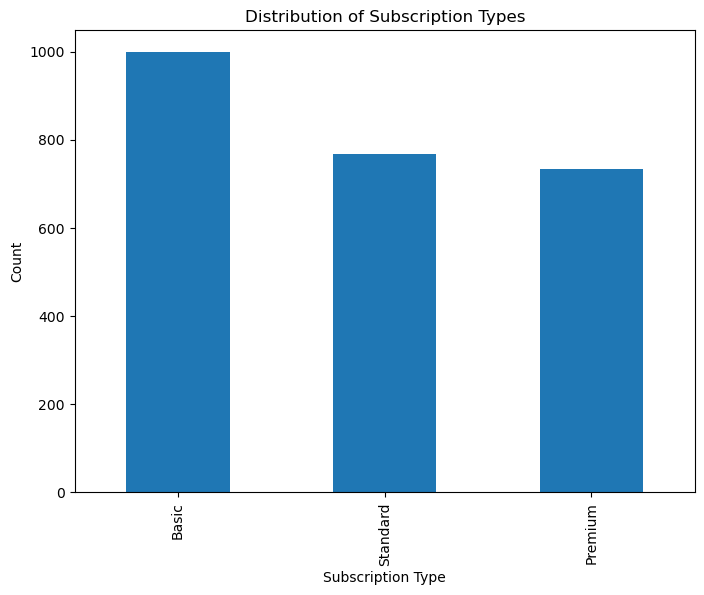

In [28]:
# Bar chart
plt.figure(figsize=(8, 6))
subscription_type_counts.plot(kind='bar')
plt.title("Distribution of Subscription Types")
plt.xlabel("Subscription Type")
plt.ylabel("Count")

In [29]:
# Display the count and percentage distribution
print("Subscription Type Counts:")
print(subscription_type_counts)

Subscription Type Counts:
SubscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


In [30]:
print("\nSubscription Type Percentage Distribution:")
print(subscription_type_percentage)


Subscription Type Percentage Distribution:
SubscriptionType
Basic       39.96
Standard    30.72
Premium     29.32
Name: proportion, dtype: float64


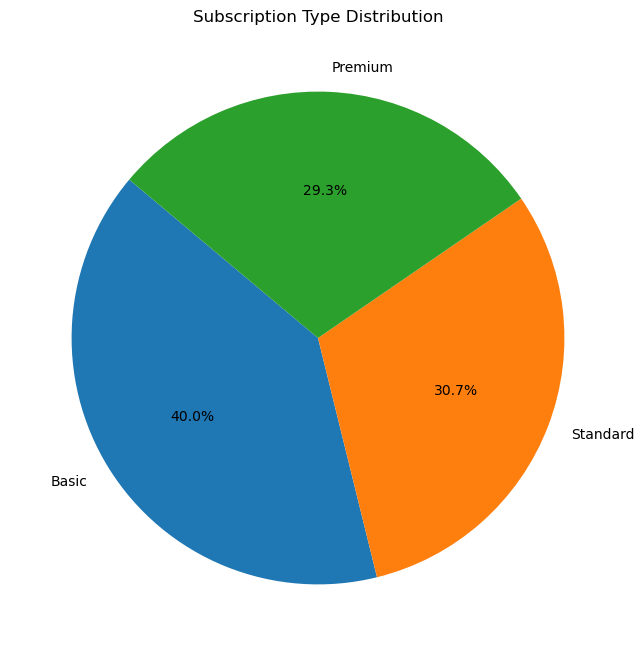

In [31]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subscription_type_counts, labels=subscription_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Subscription Type Distribution")

# Display the pie chart
plt.show()

In [32]:
# Lets do Univariate Analysis on Country Column

In [33]:
 #Count the frequency of customers from each country
country_counts = Data['Country'].value_counts()

# Calculate the percentage distribution of customers from each country
country_percentage = (country_counts / country_counts.sum()) * 100

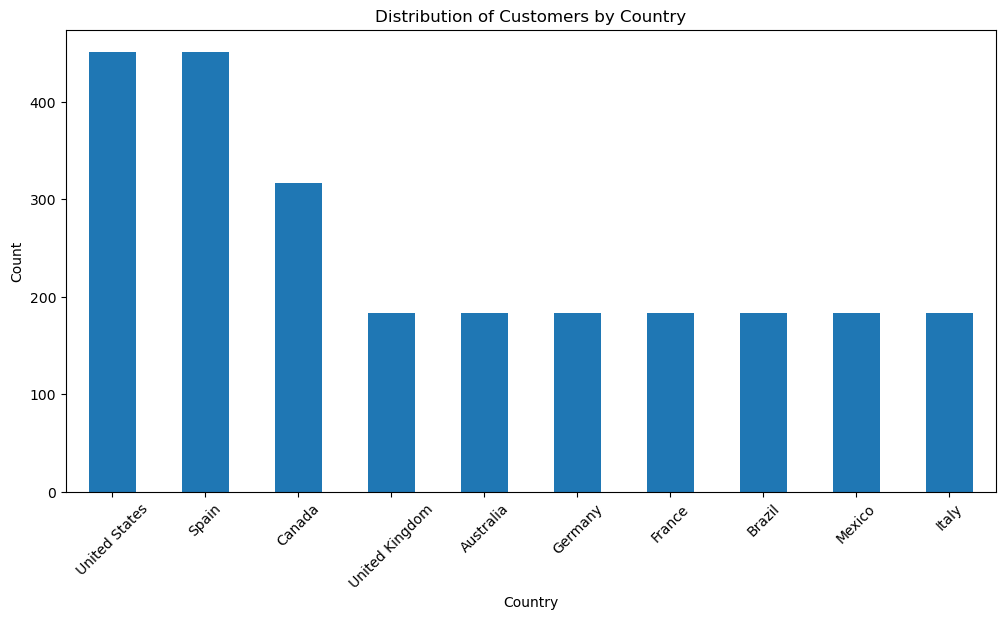

In [34]:
# Create a bar chart for the country distribution
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title("Distribution of Customers by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


In [35]:
# Display the count and percentage distribution
print("Country Counts:")
print(country_counts)

print("\nCountry Percentage Distribution:")
print(country_percentage)

Country Counts:
Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

Country Percentage Distribution:
Country
United States     18.04
Spain             18.04
Canada            12.68
United Kingdom     7.32
Australia          7.32
Germany            7.32
France             7.32
Brazil             7.32
Mexico             7.32
Italy              7.32
Name: count, dtype: float64


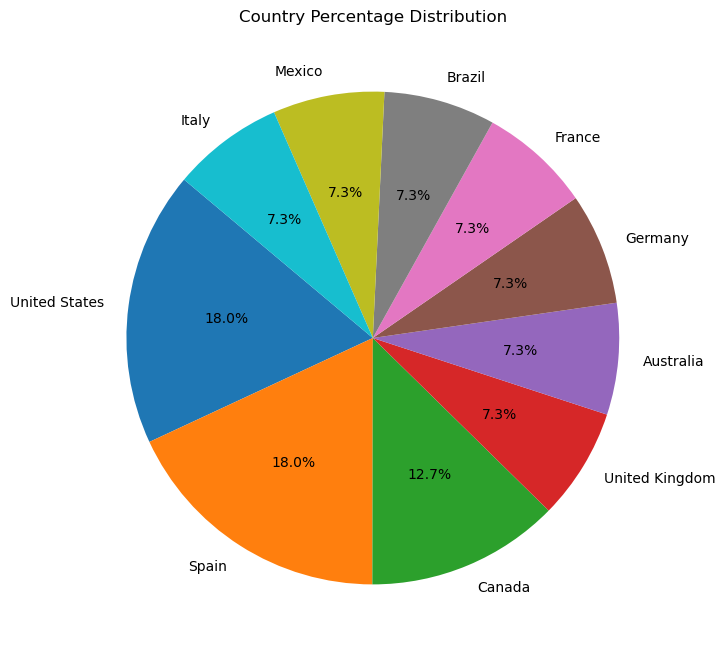

In [36]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_percentage, labels=country_percentage.index, autopct='%1.1f%%',startangle=140)
plt.title("Country Percentage Distribution")

# Display the pie chart
plt.show()

In [37]:
# Univariate Analysis on Gender Column

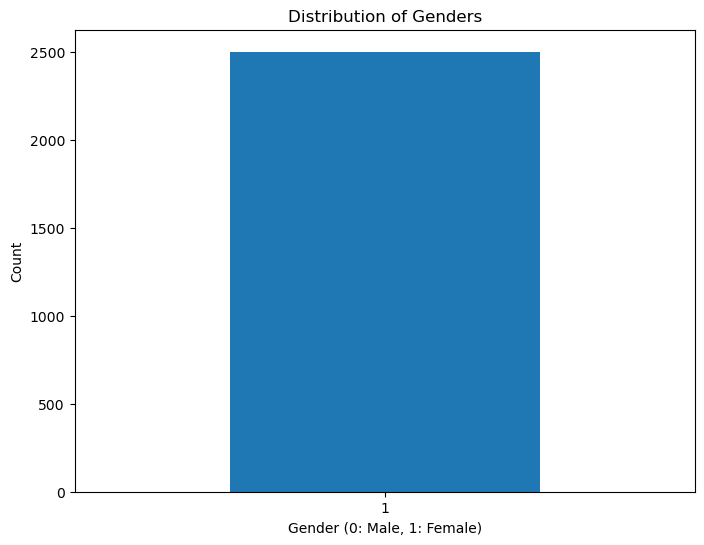

Gender Counts:
Gender
1    2500
Name: count, dtype: int64

Gender Percentage Distribution:
Gender
1    100.0
Name: count, dtype: float64


In [38]:
# Count the frequency of each gender (0 for Male, 1 for Female)
gender_counts = Data['Gender'].value_counts()

# Calculate the percentage distribution of genders
gender_percentage = (gender_counts / gender_counts.sum()) * 100

# Create a bar chart for the gender distribution
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title("Distribution of Genders")
plt.xlabel("Gender (0: Male, 1: Female)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Display the count and percentage distribution
print("Gender Counts:")
print(gender_counts)

print("\nGender Percentage Distribution:")
print(gender_percentage)

In [39]:
# univariate Analysis on Device

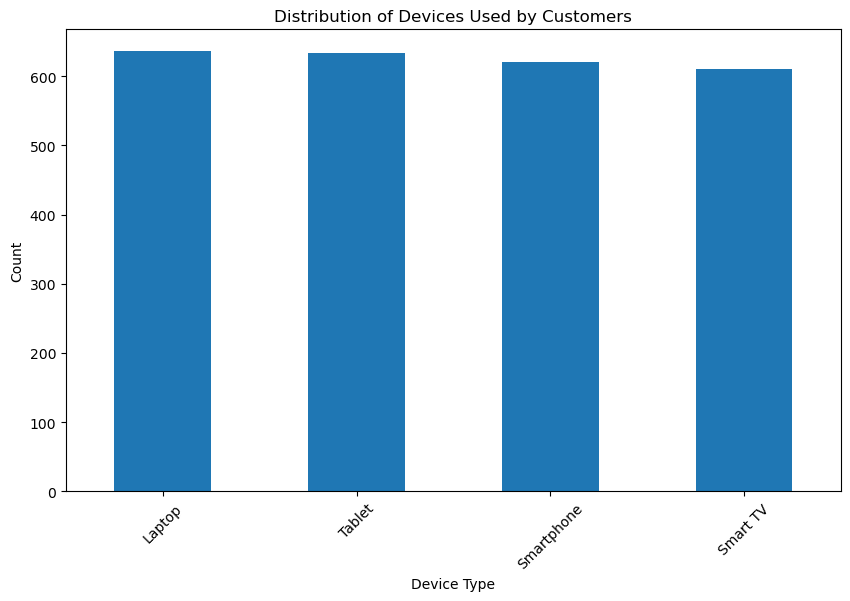

Device Counts:
Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

Device Percentage Distribution:
Device
Laptop        25.44
Tablet        25.32
Smartphone    24.84
Smart TV      24.40
Name: count, dtype: float64


In [40]:
# Count the frequency of each type of device
device_counts = Data['Device'].value_counts()

# Calculate the percentage distribution of different devices
device_percentage = (device_counts / device_counts.sum()) * 100

# Create a bar chart for the device distribution
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar')
plt.title("Distribution of Devices Used by Customers")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Display the count and percentage distribution
print("Device Counts:")
print(device_counts)

print("\nDevice Percentage Distribution:")
print(device_percentage)

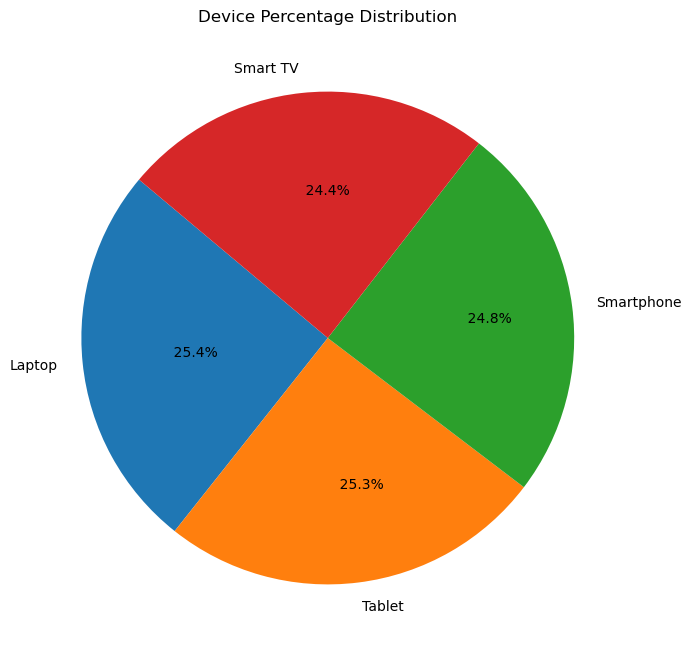

In [41]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(device_percentage , labels=device_percentage .index, autopct='%11.1f%%',startangle=140)
plt.title("Device Percentage Distribution")

# Display the pie chart
plt.show()

In [42]:
# univariate Analysis on PlanDuration

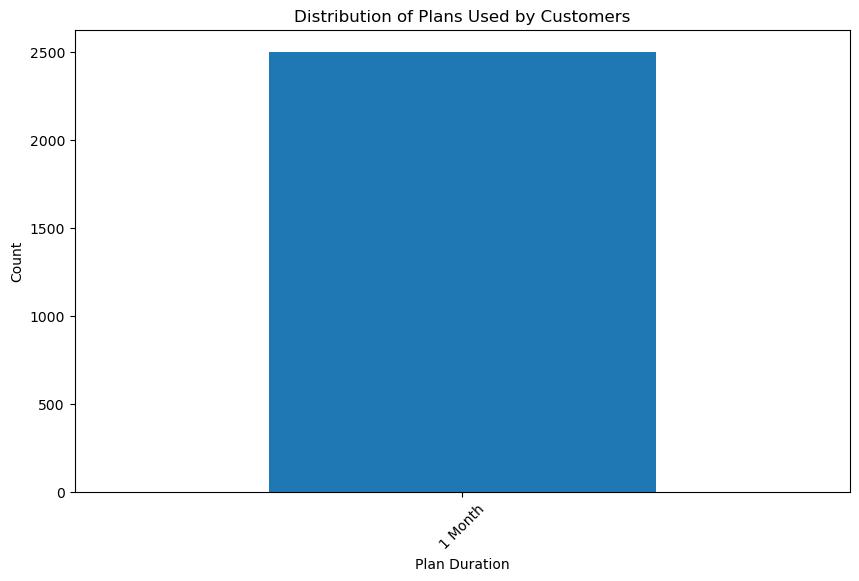

Plan Duration
PlanDuration
1 Month    2500
Name: count, dtype: int64

Plan Percentage Distribution:
PlanDuration
1 Month    100.0
Name: count, dtype: float64


In [43]:
# Count the frequency of Plan Dutation
plan_Duration = Data['PlanDuration'].value_counts()

# Calculate the percentage distribution of different devices
plan_DurationPercentage = (plan_Duration / plan_Duration.sum()) * 100

# Create a bar chart for the device distribution
plt.figure(figsize=(10, 6))
plan_Duration.plot(kind='bar')
plt.title("Distribution of Plans Used by Customers")
plt.xlabel("Plan Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Display the count and percentage distribution
print("Plan Duration")
print(plan_Duration)

print("\nPlan Percentage Distribution:")
print(plan_DurationPercentage)

In [44]:
# univariate Analysis on Age Group

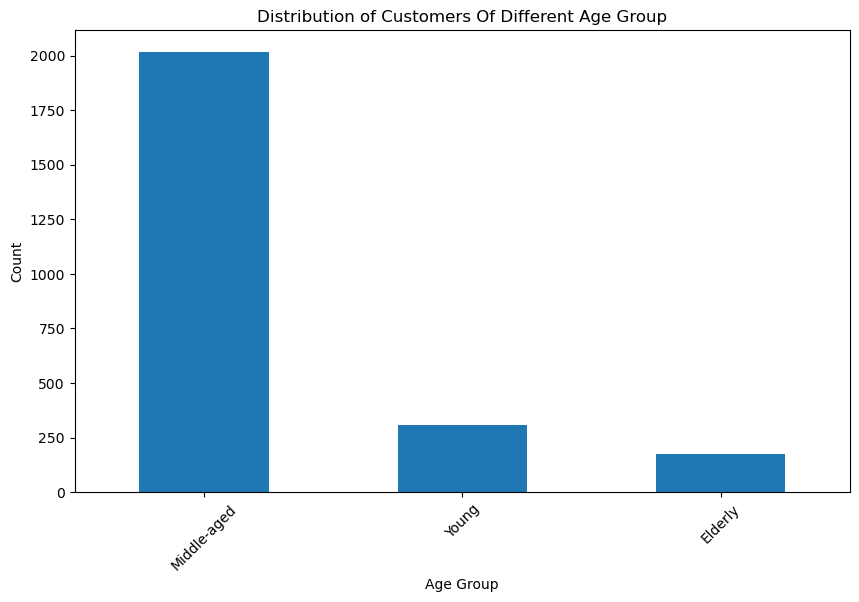

Age_Group
Age Group
Middle-aged    2016
Young           307
Elderly         177
Name: count, dtype: int64

Age_Group_Percentage
Age Group
Middle-aged    80.64
Young          12.28
Elderly         7.08
Name: count, dtype: float64


In [45]:
# Count the frequency of Different Age Group
Age_Group = Data['Age Group'].value_counts()

# Calculate the percentage distribution of different devices
Age_Group_Percentage= (Age_Group / Age_Group.sum()) * 100

# Create a bar chart for the device distribution
plt.figure(figsize=(10, 6))
Age_Group.plot(kind='bar')
plt.title("Distribution of Customers Of Different Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Display the count and percentage distribution
print("Age_Group")
print(Age_Group)

print("\nAge_Group_Percentage")
print(Age_Group_Percentage)

In [46]:
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
0,Basic,10,2022-01-15,2023-06-10,United States,28,1,Smartphone,1 Month,511 days,2022,1,15,2023,6,10,Young
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,655 days,2021,9,5,2023,6,22,Middle-aged
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,1,Smart TV,1 Month,119 days,2023,2,28,2023,6,27,Middle-aged
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,351 days,2022,7,10,2023,6,26,Elderly
4,Basic,10,2023-05-01,2023-06-28,Germany,33,1,Smartphone,1 Month,58 days,2023,5,1,2023,6,28,Middle-aged


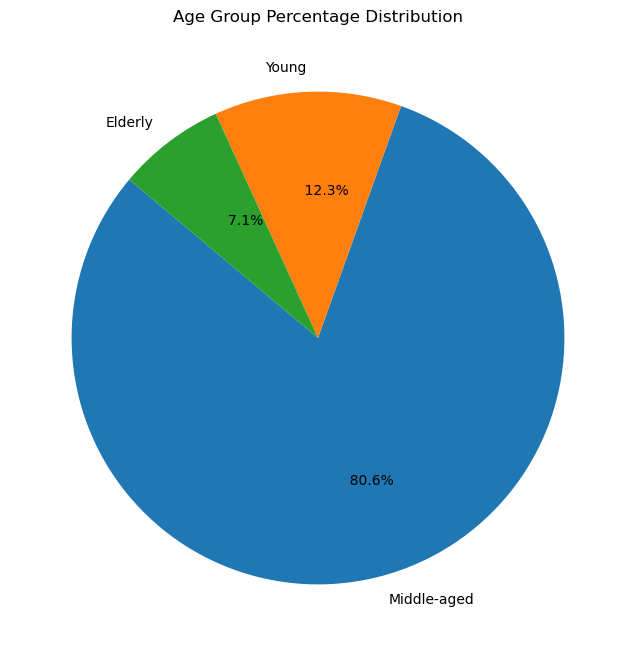

In [47]:
# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(Age_Group , labels=Age_Group_Percentage .index, autopct='%11.1f%%',startangle=140)
plt.title("Age Group Percentage Distribution")

# Display the pie chart
plt.show()

In [48]:
# For The Catogorical Univariate Analysis We Can Have Below Observations

# Lets Do univariate Analysis for Univariate Numerical Data

In [50]:
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
0,Basic,10,2022-01-15,2023-06-10,United States,28,1,Smartphone,1 Month,511 days,2022,1,15,2023,6,10,Young
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,655 days,2021,9,5,2023,6,22,Middle-aged
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,1,Smart TV,1 Month,119 days,2023,2,28,2023,6,27,Middle-aged
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,351 days,2022,7,10,2023,6,26,Elderly
4,Basic,10,2023-05-01,2023-06-28,Germany,33,1,Smartphone,1 Month,58 days,2023,5,1,2023,6,28,Middle-aged


In [51]:
# Numerical Analysis  based On Monthly Revenue

In [52]:
for column in num_cols:
    print(column, ':')
    print(Data[column].describe())

MonthlyRevenue :
count    2500.000000
mean       12.508400
std         1.686851
min        10.000000
25%        11.000000
50%        12.000000
75%        14.000000
max        15.000000
Name: MonthlyRevenue, dtype: float64
Age :
count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64
Gender :
count    2500.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Gender, dtype: float64
Subscription Duration :
count                          2500
mean       308 days 14:51:38.880000
std      63 days 02:06:58.055345063
min                 8 days 00:00:00
25%               261 days 00:00:00
50%               307 days 00:00:00
75%               356 days 00:00:00
max               655 days 00:00:00
Name: Subscription Duration, dtype: object
joinYear :
count    2500.000000
mean     2022.009600
std 

In [53]:
# Frequency of Monthly Revenue 

C:\Users\khurr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


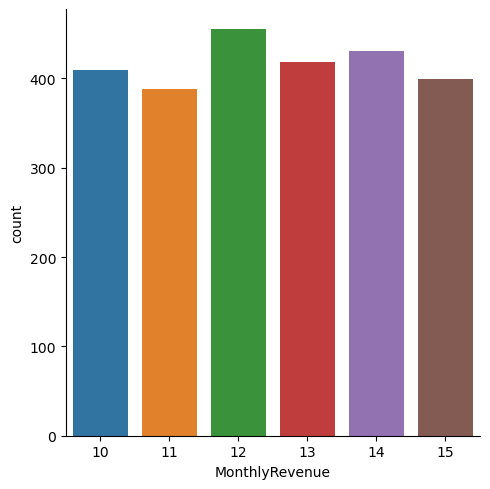

In [55]:
sns.catplot(x = "MonthlyRevenue" , data =Data  , kind = "count" )

In [57]:
import pandas as pd

Data['Subscription Duration'] = pd.to_numeric(Data['Subscription Duration'])

In [60]:
# Since Subscription Duration  Contains Lots Of numerical Value So we Need To categorise In Terms Of Months

In [61]:
# Define age group bins and labels
Subscription_bins = [0, 30, 400, 900,]  # Define age bins
Subscription_labels = ['Low: Less than 3 months',
'Medium: 3 to 6 months',
'High: 6 months or more']  # Define corresponding labels

# Create the "Age Group" feature
Data['Subscription Duration'] = pd.cut(Data['Age'], bins=Subscription_bins, labels=Subscription_labels, right=False)

# Print the DataFrame with the "Age Group" feature
Data.head()

,SubscriptionType,MonthlyRevenue,joinDate,LastPaymentDate,Country,Age,Gender,Device,PlanDuration,Subscription Duration,joinYear,Join Month,Join Day,LastPaymentYear,Last Payment Month,Last Payment Day,Age Group
0,Basic,10,2022-01-15,2023-06-10,United States,28,1,Smartphone,1 Month,Low: Less than 3 months,2022,1,15,2023,6,10,Young
1,Premium,15,2021-09-05,2023-06-22,Canada,35,1,Tablet,1 Month,Medium: 3 to 6 months,2021,9,5,2023,6,22,Middle-aged
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,1,Smart TV,1 Month,Medium: 3 to 6 months,2023,2,28,2023,6,27,Middle-aged
3,Standard,12,2022-07-10,2023-06-26,Australia,51,1,Laptop,1 Month,Medium: 3 to 6 months,2022,7,10,2023,6,26,Elderly
4,Basic,10,2023-05-01,2023-06-28,Germany,33,1,Smartphone,1 Month,Medium: 3 to 6 months,2023,5,1,2023,6,28,Middle-aged


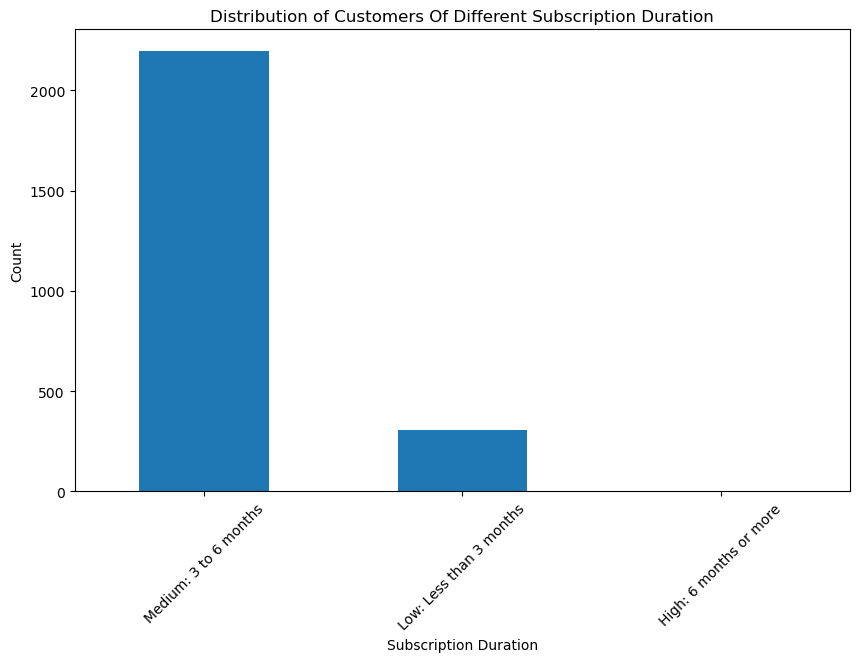

Subscription Duration
Subscription Duration
Medium: 3 to 6 months      2193
Low: Less than 3 months     307
High: 6 months or more        0
Name: count, dtype: int64

Age_Group_Percentage
Subscription Duration
Medium: 3 to 6 months      87.72
Low: Less than 3 months    12.28
High: 6 months or more      0.00
Name: count, dtype: float64


In [62]:
# Count the frequency of Different Age Group
Subs_Dur = Data['Subscription Duration'].value_counts()

# Calculate the percentage distribution of different devices
Subs_Dur_Percentage= (Subs_Dur / Subs_Dur.sum()) * 100

# Create a bar chart for the device distribution
plt.figure(figsize=(10, 6))
Subs_Dur.plot(kind='bar')
plt.title("Distribution of Customers Of Different Subscription Duration")
plt.xlabel("Subscription Duration")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# Display the count and percentage distribution
print("Subscription Duration")
print(Subs_Dur)

print("\nAge_Group_Percentage")
print(Subs_Dur_Percentage)

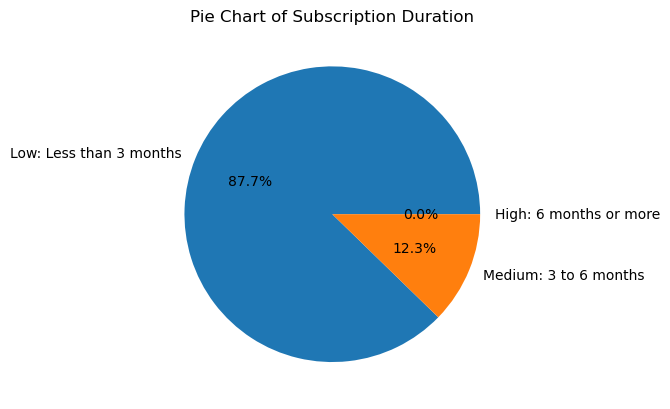

In [63]:
# Create a pie chart of the Subscription Duration column
plt.pie(Subs_Dur_Percentage, labels=Subscription_labels , autopct="%1.1f%%")
plt.title("Pie Chart of Subscription Duration")
plt.show()

Pairplot for numerical variables

# Bivariate Analysis

 EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables 
present in the dataset.

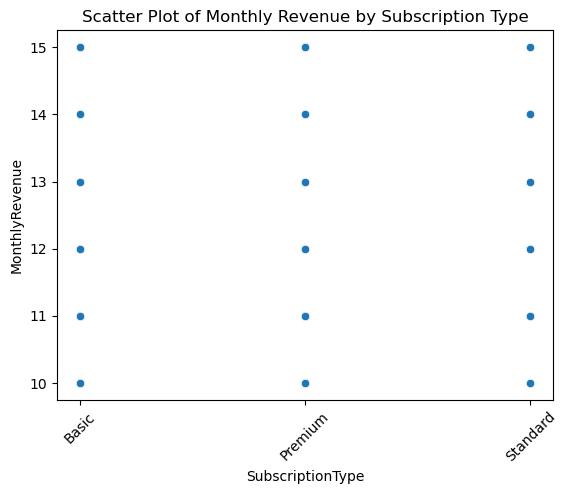

In [65]:
# Let's assume you want to analyze the relationship between 'SubscriptionType' and 'MonthlyRevenue'

# 1. Scatter plot
sns.scatterplot(data=Data, x='SubscriptionType', y='MonthlyRevenue')
plt.title('Scatter Plot of Monthly Revenue by Subscription Type')
plt.xticks(rotation=45)
plt.show()

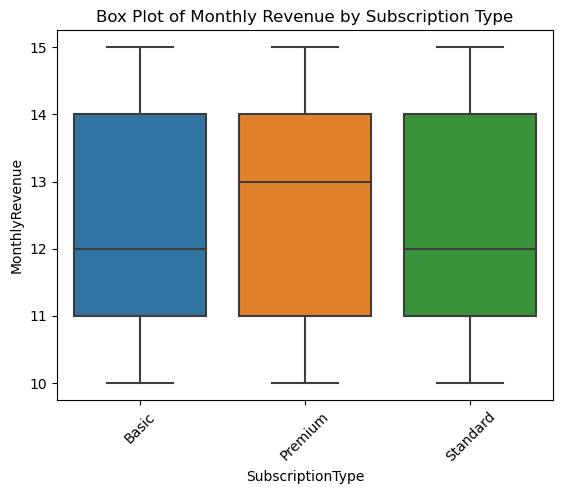

In [66]:
# 2. Box plot
sns.boxplot(data=Data, x='SubscriptionType', y='MonthlyRevenue')
plt.title('Box Plot of Monthly Revenue by Subscription Type')
plt.xticks(rotation=45)
plt.show()


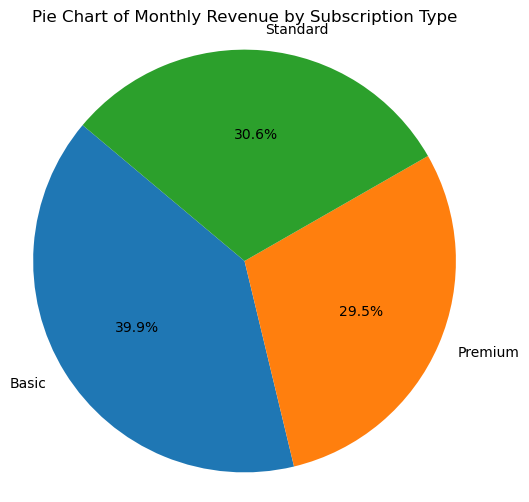

In [67]:
 
revenue_by_subscription = Data.groupby('SubscriptionType')['MonthlyRevenue'].sum()

# Extract labels and values
labels = revenue_by_subscription.index
values = revenue_by_subscription.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Monthly Revenue by Subscription Type')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [68]:
# Basic Gives The Highest Monthly Revenue

In [69]:
# Relation Between Monthly Revenue And Age

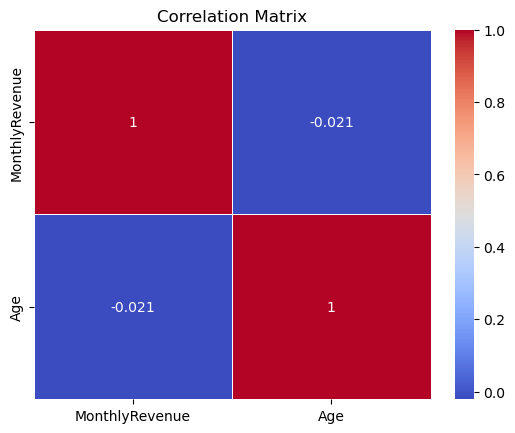

In [70]:
# 5. Correlation matrix (for numerical variables)
numerical_columns = ['MonthlyRevenue', 'Age']
correlation_matrix = Data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Correlation Coefficient:
Calculate the correlation coefficient (e.g., Pearson correlation) between 'Age' and 'MonthlyRevenue' to measure the strength and
direction of their relationship.

In [71]:
correlation_coefficient = Data['Age'].corr(Data['MonthlyRevenue'])
print(f'Correlation Coefficient (Age vs. MonthlyRevenue): {correlation_coefficient}')


Correlation Coefficient (Age vs. MonthlyRevenue): -0.02114326407144743


This value indicates a very weak negative correlation between Age And Monthly Revenue

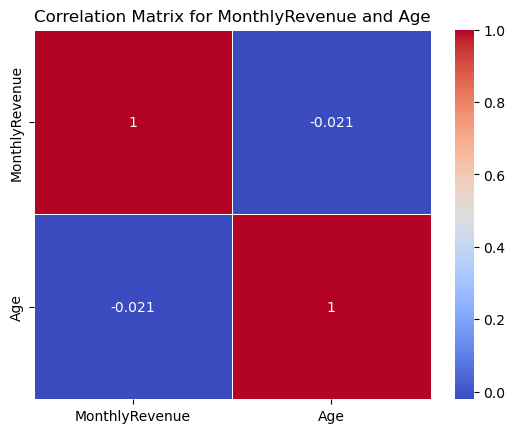

In [72]:
# Select numerical columns
numerical_columns = ['MonthlyRevenue', 'Age']

# Create a correlation matrix
correlation_matrix = Data[numerical_columns].corr()

# Generate a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the plot title
plt.title('Correlation Matrix for MonthlyRevenue and Age')

# Display the heatmap
plt.show()

In [73]:
#  Relationship between 'SubscriptionType' and 'Country' 

# Frequency Table:
Create a frequency table or a cross-tabulation to count the occurrences of each combination of 'SubscriptionType'
 and 'Country'. This will give you an initial overview of the distribution

In [74]:
# Create a frequency table
frequency_table = pd.crosstab(Data['SubscriptionType'], Data['Country'])
print(frequency_table)

Country           Australia  Brazil  Canada  France  Germany  Italy  Mexico  \
SubscriptionType                                                              
Basic                    31     146     145      36      149    176       4   
Premium                 101      33      88     147        3      4       0   
Standard                 51       4      84       0       31      3     179   

Country           Spain  United Kingdom  United States  
SubscriptionType                                        
Basic               110               3            199  
Premium             212               0            145  
Standard            129             180            107  


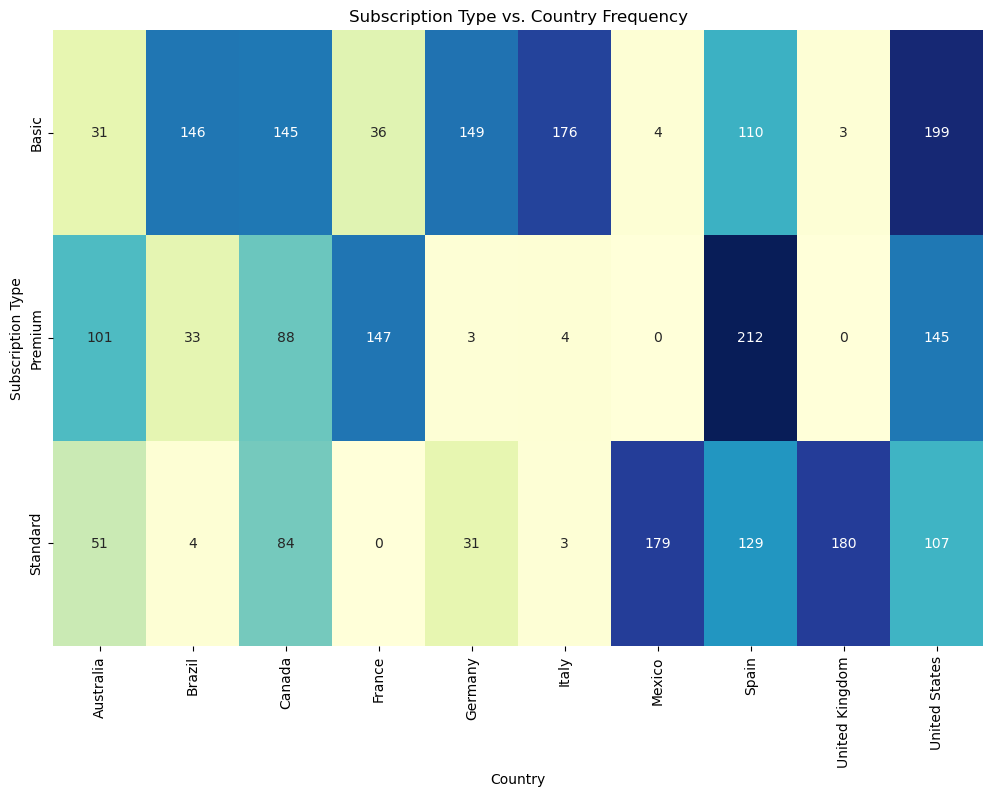

In [75]:
# Create a frequency table
frequency_table = pd.crosstab(Data['SubscriptionType'], Data['Country'])

# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(frequency_table, cmap='YlGnBu', annot=True, fmt='g', cbar=False)
plt.title('Subscription Type vs. Country Frequency')
plt.xlabel('Country')
plt.ylabel('Subscription Type')

# Display the heatmap
plt.show()

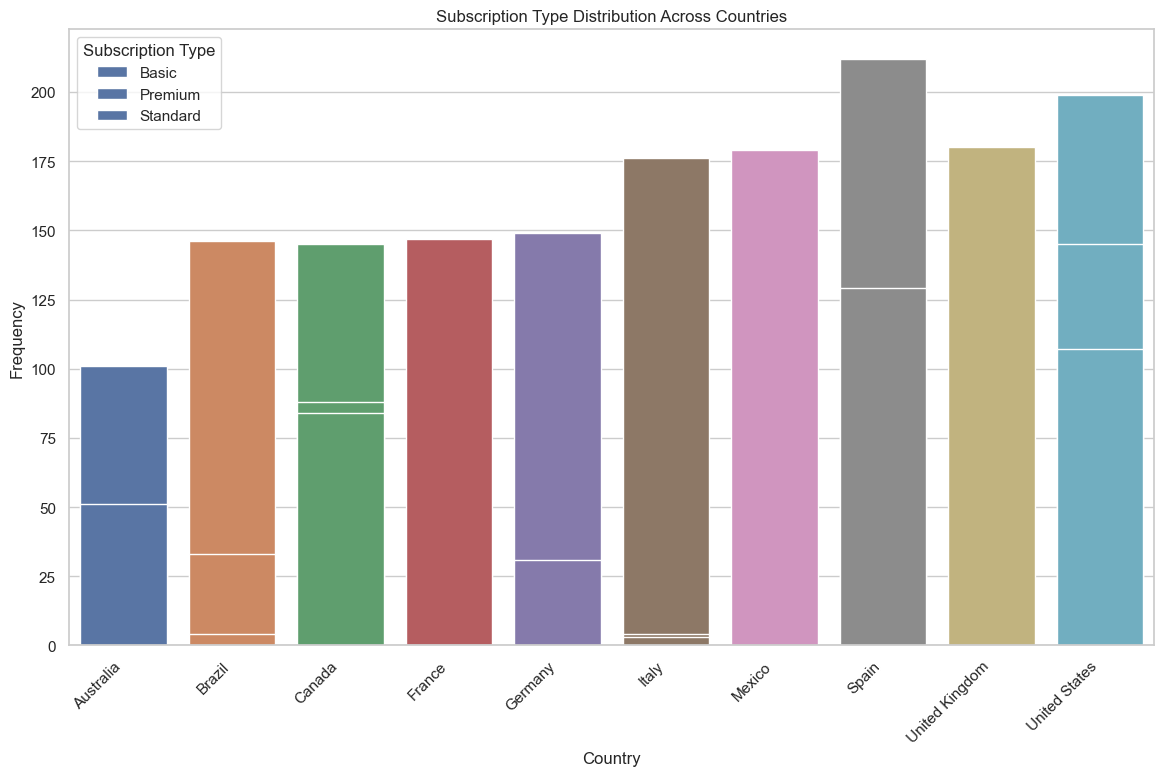

In [76]:
# Create a frequency table
frequency_table = pd.crosstab(Data['SubscriptionType'], Data['Country'])

# Set up the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot for each Subscription Type
for subscription_type in frequency_table.index:
    sns.barplot(x=frequency_table.columns, y=frequency_table.loc[subscription_type], label=subscription_type)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Subscription Type Distribution Across Countries')
plt.legend(title='Subscription Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

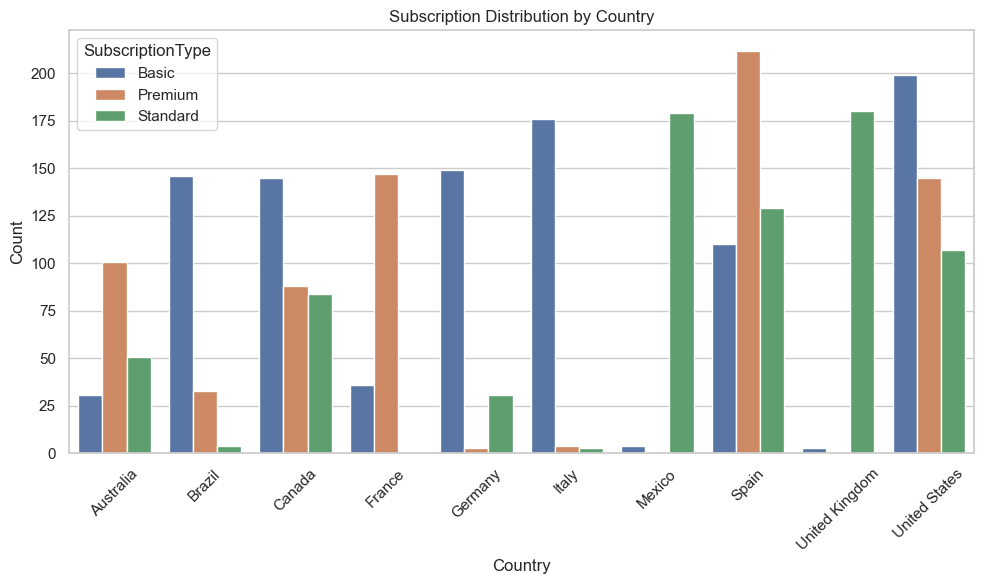

In [77]:
import seaborn as sns
grouped_data = Data.groupby(['Country', 'SubscriptionType']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='count', hue='SubscriptionType', data=grouped_data)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Subscription Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# Visualize the relationship using a heatmap or a clustered bar chart to highlight patterns in the data

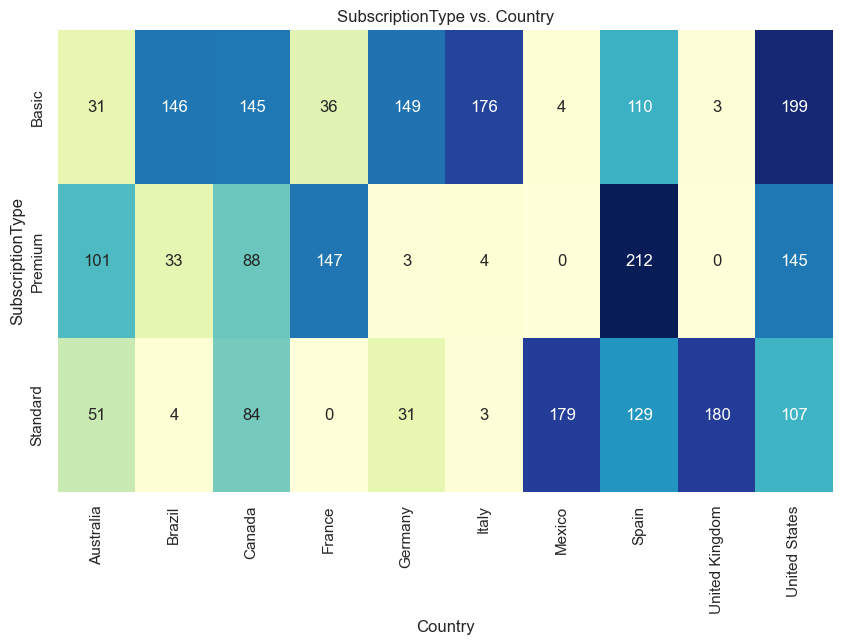

In [79]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(frequency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=False)
plt.title('SubscriptionType vs. Country')
plt.show()

In [80]:
# Heatmap shows United Kingdom has Highest No of Standard Subscription Type user
# Spain has Highest No of Premiun Subscription Type user
# United States Has Hignest No Of Basic Subscription Type User

What is the relationship between 'Device' and 'MonthlyRevenue'?

Explore whether the device used by subscribers affects their monthly spending.

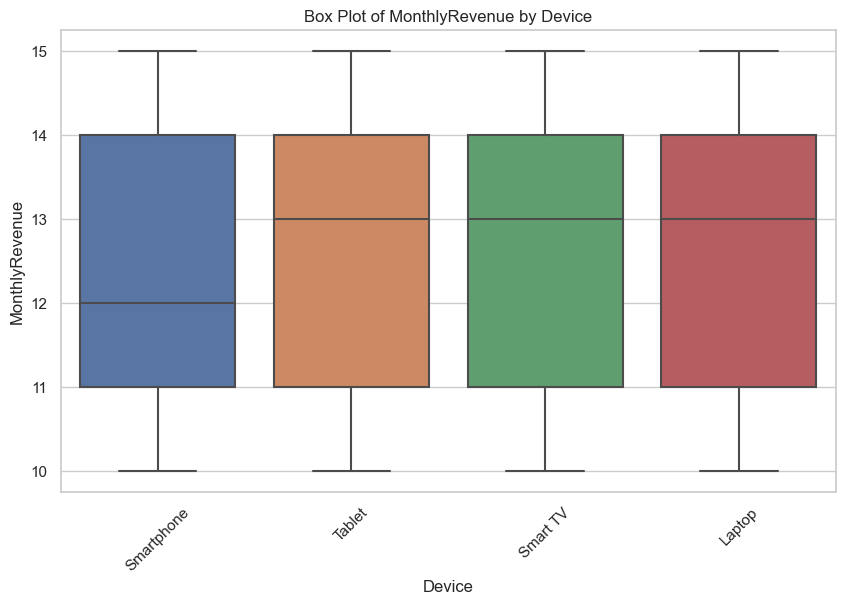

In [81]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='Device', y='MonthlyRevenue')
plt.title('Box Plot of MonthlyRevenue by Device')
plt.xlabel('Device')
plt.ylabel('MonthlyRevenue')
plt.xticks(rotation=45)
plt.show()

In [82]:
# Calculate summary statistics for 'MonthlyRevenue' by 'Device'
device_summary = Data.groupby('Device')['MonthlyRevenue'].agg(['mean', 'median', 'std']).reset_index()

# Find the device with the highest mean monthly revenue
highest_mean_revenue_device = device_summary.loc[device_summary['mean'].idxmax()]

# Find the device with the highest median monthly revenue
highest_median_revenue_device = device_summary.loc[device_summary['median'].idxmax()]

print("Device with Highest Mean Monthly Revenue:")
print(highest_mean_revenue_device)
print()

print("Device with Highest Median Monthly Revenue:")
print(highest_median_revenue_device)


Device with Highest Mean Monthly Revenue:
Device       Tablet
mean      12.592417
median         13.0
std        1.703888
Name: 3, dtype: object

Device with Highest Median Monthly Revenue:
Device       Laptop
mean      12.569182
median         13.0
std        1.675181
Name: 0, dtype: object


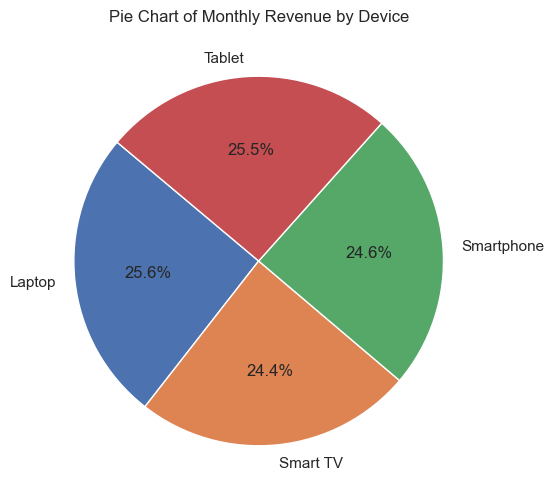

In [84]:
revenue_by_device = Data.groupby('Device')['MonthlyRevenue'].sum()

# Extract labels and values
labels = revenue_by_device.index
values = revenue_by_device.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Monthly Revenue by Device')

# Display the pie chart
plt.show()

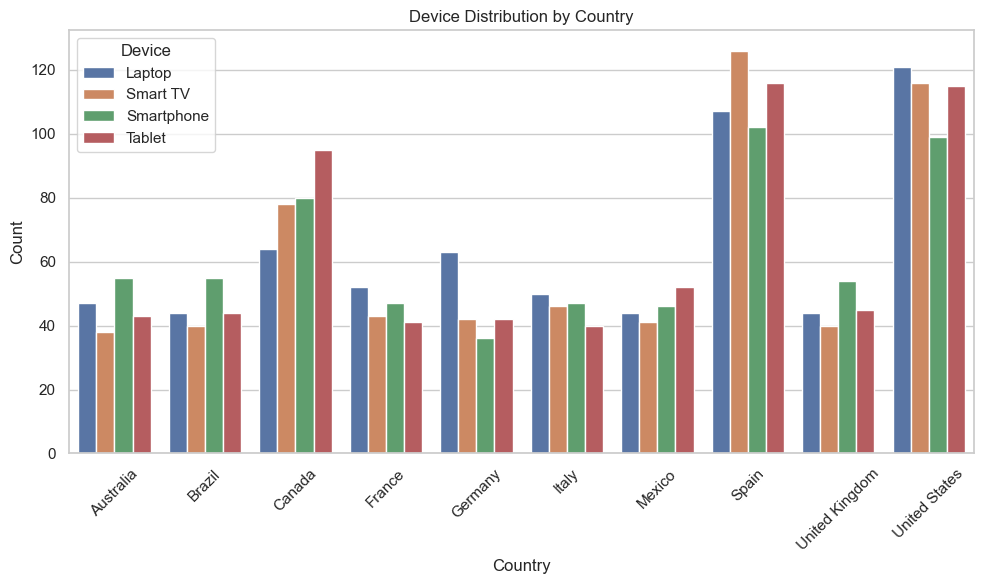

In [85]:
country_device = Data.groupby(['Country', 'Device']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='count', hue='Device', data=country_device)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Device Distribution by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [86]:
#Analysis Of Age by Plan Duration:

# Subscription Duration by Age Group

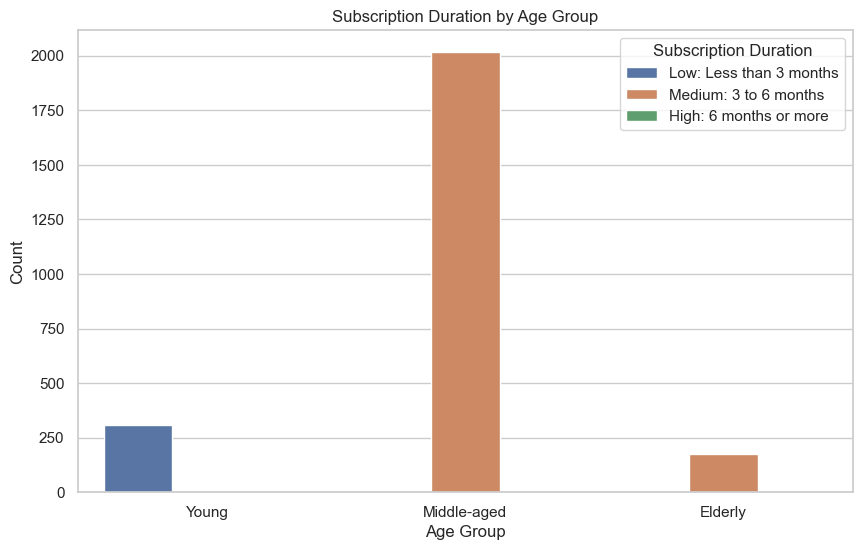

In [88]:
# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='Age Group', hue='Subscription Duration')
plt.title('Subscription Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Subscription Duration')


plt.show()

Middle Age Group has Highest Subscription Duration

In [89]:
# Monthly Revenue by Join Year
#To visualize the relationship between monthly revenue and join year, 

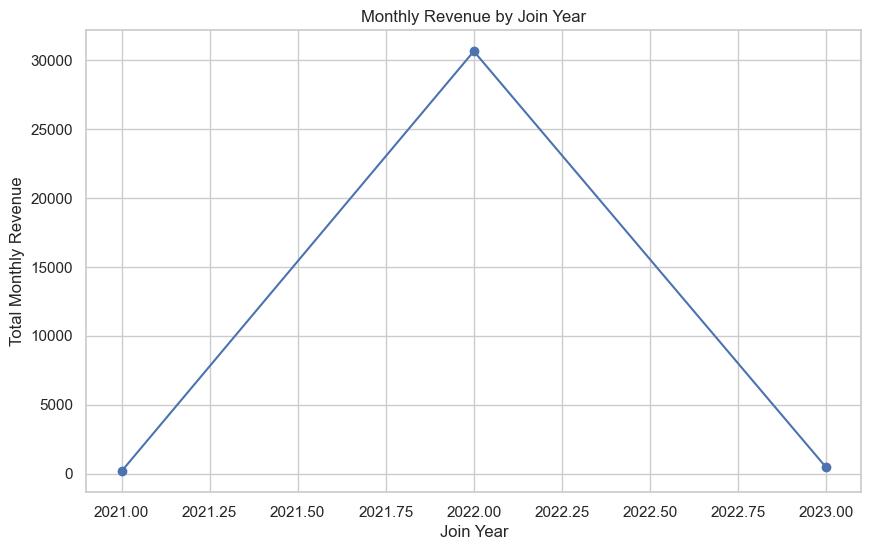

In [90]:
# Group the data by 'joinYear' and calculate the total monthly revenue for each year
revenue_by_join_year = Data.groupby('joinYear')['MonthlyRevenue'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_join_year.index, revenue_by_join_year.values, marker='o', linestyle='-')
plt.title('Monthly Revenue by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Total Monthly Revenue')

# Display the chart
plt.grid(True)
plt.show()

Line Chart Shows that people Joining in Year(2022) has the Highest month Revenue

In [91]:
# Relation Between Country and Monthly Revenue

Country
United States     5664
Spain             5662
Canada            3950
United Kingdom    2318
Italy             2317
France            2307
Brazil            2285
Australia         2271
Germany           2260
Mexico            2237
Name: MonthlyRevenue, dtype: int64


<BarContainer object of 10 artists>

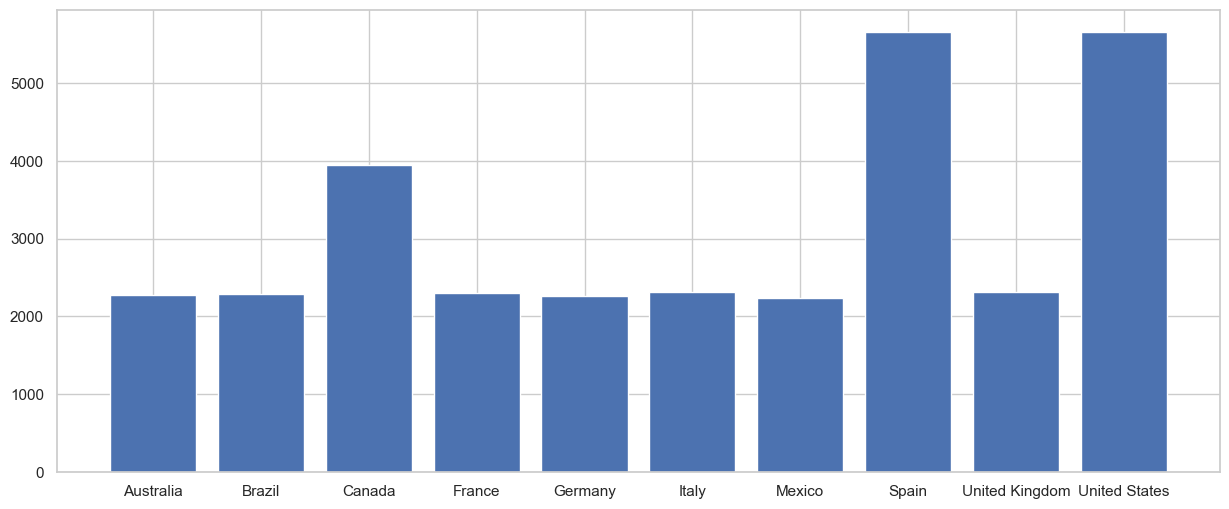

In [92]:
country_revenue = Data.groupby(['Country'])['MonthlyRevenue'].sum()
print(country_revenue.sort_values(ascending=False))
plt.figure(figsize=(15,6))
plt.bar(country_revenue.index,country_revenue.values,align='center')

# Multivariate Analysis

As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships
and manalyze patterns for any dataset.

In [93]:
Numerical_Variables=['MonthlyRevenue', 'Age', 'joinYear', 'Join Month', 'Join Day','Last Payment Month', 'Last Payment Day']
inp1=Data[Numerical_Variables].copy()

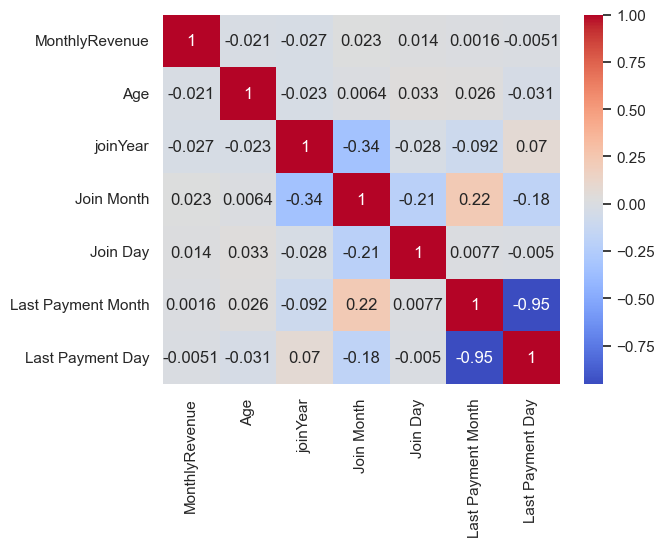

In [94]:
correlation_matrix = inp1.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()


In [95]:
# 1.	Monthly Revenue Decreases By increasing in Age Group
# 2.	Age And Join Date Has no correlation It means That there is no any relation between Join Date And Age
#3.	Join day and last payment date has Alo no correlation Showing no relation in data


In [97]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SubscriptionType       2500 non-null   object        
 1   MonthlyRevenue         2500 non-null   int64         
 2   joinDate               2500 non-null   datetime64[ns]
 3   LastPaymentDate        2500 non-null   datetime64[ns]
 4   Country                2500 non-null   object        
 5   Age                    2500 non-null   int64         
 6   Gender                 2500 non-null   int64         
 7   Device                 2500 non-null   object        
 8   PlanDuration           2500 non-null   object        
 9   Subscription Duration  2500 non-null   category      
 10  joinYear               2500 non-null   int32         
 11  Join Month             2500 non-null   int32         
 12  Join Day               2500 non-null   int32         
 13  Las

# Distributions

In [ ]:
for column in num_cols:
    print(column, ':')
    print(Data[column].describe())

PDF OF Monthly income

 As you can see The majority of income values cluster 
 around the mean (average) income, which is at the center of the curve.

PDF OF Age Group

 As you can see the mean lies at 40 which indicates majority of customer are middle aged

PDF of joinYear

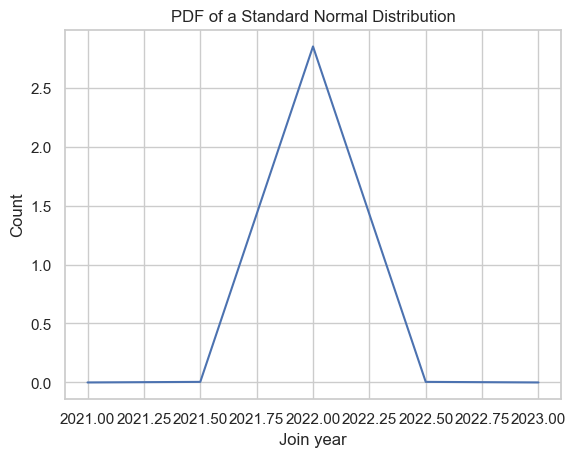

In [101]:
mean =2022.0
std_dev = 0.14
x = np.linspace(2021, 2023,5)
pdf = norm.pdf(x, mean, std_dev)

plt.plot(x, pdf)
plt.title("PDF of a Standard Normal Distribution")
plt.xlabel("Join year")
plt.ylabel("Count")
plt.show()

As we can see there is a slight increase in number of customer between the year 2021 and 2022

Pdf of Join month

As we can see we have More no of Subscriber In month of June to december it is left Skwed

# Hypothesis Testing

Null Hypothesis (H0):
The monthly revenue is the same for all subscription types. In other words, there is no significant difference in monthly revenue between subscription types.

Alternative Hypothesis (H1):


The monthly revenue is not the same for all subscription types. There is a significant difference in monthly revenue between at least two subscription types. write a t test using python 

In [ ]:
from scipy import stats
# Select two subscription types for comparison (e.g., Basic and Premium)
subscription_type_1 = 'Basic'
subscription_type_2 = 'Premium'

# Filter data for the selected subscription types
data_1 = Data[Data['SubscriptionType'] == subscription_type_1]['MonthlyRevenue']
data_2 = Data[Data['SubscriptionType'] == subscription_type_2]['MonthlyRevenue']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(data_1, data_2)  # Use stats.ttest_ind, not norm.ttest_ind

# Define your significance level (alpha)
alpha = 0.05

# Compare the p-value to alpha to make a decision
if p_value < alpha:
    print(f"Reject the null hypothesis (H0). There is a significant difference in monthly revenue between {subscription_type_1} and {subscription_type_2}.")
else:
    print(f"Fail to reject the null hypothesis (H0). There is no significant difference in monthly revenue between {subscription_type_1} and {subscription_type_2}.")

# Output the t-statistic and p-value
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


In [ ]:
f"Reject the null hypothesis (H0). There is a significant difference in monthly revenue between {subscription_type_1} and {subscription_type_2}

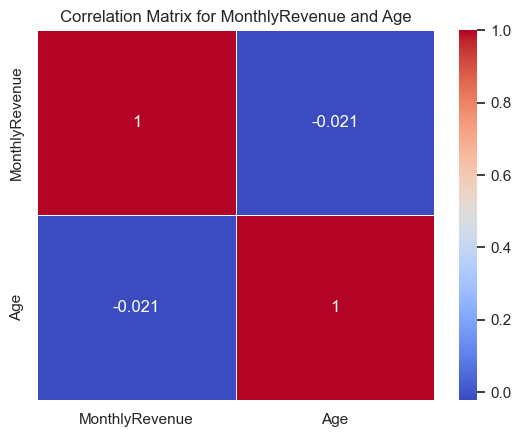

In [107]:
# Select numerical columns
numerical_columns = ['MonthlyRevenue', 'Age']

# Create a correlation matrix
correlation_matrix = Data[numerical_columns].corr()

# Generate a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the plot title
plt.title('Correlation Matrix for MonthlyRevenue and Age')

# Display the heatmap
plt.show()